In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [146]:
database = pd.read_csv('lyrics.csv')

In [147]:
print(database.columns)

Index(['index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')


In [148]:
database = database.dropna()

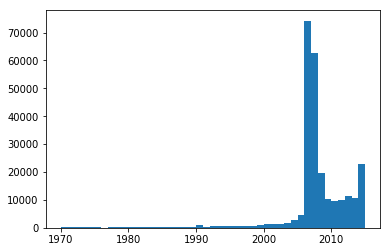

<Figure size 432x288 with 0 Axes>

In [149]:
plt.hist(database['year'], bins=range(1970, 2016, 1))
plt.show()
plt.clf()

In [150]:
sample = database[database['year']>2010]

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer(max_features = 500)

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(sample['lyrics'])

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.         0.         0.         ... 0.         0.1145744  0.        ]
 [0.09740591 0.         0.         ... 0.         0.01387339 0.        ]
 [0.         0.04183455 0.         ... 0.         0.0342029  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.02728544 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.0497512  ... 0.         0.03512569 0.        ]]
['about', 'after', 'again', 'ah', 'ain', 'air', 'al', 'alive', 'all', 'alone', 'along', 'alright', 'always', 'am', 'amor', 'an', 'and', 'another', 'any', 'anything', 'are', 'arms', 'around', 'as', 'ask', 'ass', 'at', 'away', 'ay', 'baby', 'back', 'bad', 'be', 'beat', 'beautiful', 'because', 'been', 'before', 'behind', 'being', 'believe', 'best', 'better', 'big', 'bitch', 'bitches', 'black', 'blood', 'blow', 'blue', 'body', 'bout', 'boy', 'break', 'bring', 'broken', 'burn', 'but', 'by', 'call', 'came', 'can', 'care', 'cause', 'chance', 'change', 'che'

In [151]:
len(words)

500

In [152]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=30)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
labels = pipeline.predict(csr_mat)

# Create a DataFrame aligning labels and titles: df
dataframe = pd.DataFrame({'label': labels, 'song': sample['song'], 'artist': sample['artist'], 'year': sample['year']})

# Display df sorted by cluster label
display(dataframe.sort_values('label'))

,label,song,artist,year
165698,0,the-aristocats,disney,2015
21743,0,forgiven,bethel-music,2013
248703,0,song-is-ended,earl-hines,2016
65811,0,all-through-the-night,dave-brubeck,2014
318684,0,the-fold,bridge-to-grace,2015
21707,0,cyanidal,day-of-gray,2011
111812,0,master-key,authentic-bros,2015
65807,0,the-circus-on-parade,dave-brubeck,2014
201114,0,bonds-of-starvation,alan-g,2014
171765,0,when-the-world-was-young,anita-o-day,2014


In [153]:
display(dataframe[dataframe['artist']=='bruno-mars'])

,label,song,artist,year


In [154]:
# Create an NMF instance: model
model = NMF(n_components = 20)

# Fit the model to articles
model.fit(csr_mat)

# Transform the articles: nmf_features
nmf_features = model.transform(csr_mat)

# Print the NMF features
print(nmf_features)

# Create a pandas DataFrame: df
df2 = pd.DataFrame(nmf_features,index=sample['song'])

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

[[1.43050503e-03 0.00000000e+00 3.66970317e-02 ... 0.00000000e+00
  2.70713315e-03 3.12065463e-02]
 [7.21420544e-03 0.00000000e+00 6.70922511e-02 ... 1.03506132e-03
  3.17488507e-02 9.36145979e-03]
 [2.04806286e-02 0.00000000e+00 1.49772307e-02 ... 0.00000000e+00
  3.67276453e-04 9.20779323e-03]
 ...
 [2.41646037e-02 0.00000000e+00 1.99846353e-02 ... 0.00000000e+00
  7.59453494e-03 2.36297366e-02]
 [1.97360926e-02 4.79262842e-05 1.35310296e-02 ... 0.00000000e+00
  0.00000000e+00 2.42810686e-02]
 [6.16696814e-03 0.00000000e+00 1.20629144e-02 ... 0.00000000e+00
  2.23398049e-03 2.15559394e-03]]


In [155]:
print(df2)

                                             0         1         2         3   \
song                                                                            
back-to-black                          0.001431  0.000000  0.036697  0.006677   
mine                                   0.007214  0.000000  0.067092  0.017993   
superpower                             0.020481  0.000000  0.014977  0.010447   
haunted                                0.008919  0.000000  0.040252  0.000614   
flawless                               0.012769  0.000000  0.007630  0.033725   
partition                              0.013748  0.005120  0.014795  0.045411   
ghost                                  0.009415  0.000000  0.036965  0.005473   
xo                                     0.013513  0.000000  0.014861  0.000000   
single-ladies-put-a-ring-on-it         0.004047  0.000000  0.034155  0.006722   
on-the-run                             0.016588  0.000000  0.033334  0.042615   
no-angel                    

In [156]:
print(max(df2[0]))
component = components_df.loc[0]

print(component.nlargest(10))
display(df2[df2[0]> 0.1])

0.10364652182046087
the      7.552721
of       2.183621
in       1.535434
and      1.167359
is       0.759887
on       0.726546
from     0.551350
with     0.511254
to       0.498180
night    0.454163
Name: 0, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
the-future,0.103647,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
changes,0.103647,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
leaving-the-dock,0.103647,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
raping-of-the-dog,0.100088,0.0,0.008362,0.000796,0.005982,0.00000,0.0,0.0,0.0,0.002088,0.0006,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000616,0.001622,0.002780
antidote,0.103647,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
lover-of-the-bayou,0.103435,0.0,0.000000,0.000000,0.000000,0.00061,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.004909,0.014528,0.0,0.0,0.000332,0.004976,0.002236
lover-of-the-bayou-studio-recording,0.103435,0.0,0.000000,0.000000,0.000000,0.00061,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.004909,0.014528,0.0,0.0,0.000332,0.004976,0.002236
the-cell,0.103647,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [157]:
print(max(df2[1]))
component = components_df.loc[1]
print(component.nlargest(10))
display(df2[df2[1]> 0.137])

0.14038596369321749
que    4.553991
de     2.278576
te     1.615332
el     1.566651
mi     1.130759
tu     1.115556
en     1.076640
se     1.011422
por    1.006447
lo     0.905343
Name: 1, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
yo-te-traigo-20-aaf-os,0.000000,0.140386,0.0,0.0,0.000000,0.000159,0.0,0.000000e+00,0.007450,0.000000e+00,0.000000,0.0,0.000000,0.000343,0.0,0.0,0.009015,0.000000,0.000000,0.0
palabras-de-papel,0.000000,0.137859,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000946,0.000000e+00,0.000000,0.0,0.005745,0.004103,0.0,0.0,0.000000,0.000000,0.000000,0.0
muneca,0.000000,0.138237,0.0,0.0,0.000000,0.000006,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.012783,0.014514,0.0,0.0,0.010816,0.000000,0.000890,0.0
el-bueno,0.000000,0.137853,0.0,0.0,0.000043,0.000000,0.0,4.688359e-07,0.000000,1.800919e-08,0.000000,0.0,0.000000,0.004300,0.0,0.0,0.000000,0.003611,0.000000,0.0
olvidar-que-somos-amigos,0.000397,0.137229,0.0,0.0,0.000000,0.000184,0.0,0.000000e+00,0.004757,0.000000e+00,0.000871,0.0,0.000000,0.001182,0.0,0.0,0.015141,0.000000,0.000409,0.0


In [158]:
print(max(df2[2]))
component = components_df.loc[2]
print(component.nlargest(10))
display(df2[df2[2]> 0.101])

0.12941167980274806
you     6.528784
re      1.086379
know    0.641317
do      0.458606
can     0.454069
are     0.404158
that    0.387227
what    0.377457
if      0.369728
when    0.344486
Name: 2, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
stutter,0.000521,0.000279,0.108197,0.009799,0.005585,0.007985,0.000546,0.017622,0.000000,0.002630,0.000943,0.000000,0.003413,0.031642,0.001880,0.000000,0.003439,0.001004,0.000750,0.005655
calling-you,0.020850,0.000000,0.109835,0.000000,0.000000,0.000000,0.000000,0.008999,0.000000,0.000000,0.000000,0.002207,0.000000,0.007016,0.008633,0.004429,0.000000,0.000000,0.000000,0.000000
magic,0.035843,0.000000,0.114053,0.000000,0.000000,0.000000,0.009604,0.000000,0.000030,0.000000,0.000000,0.000000,0.000090,0.001410,0.000000,0.000923,0.000000,0.000000,0.000000,0.000000
valentine,0.008760,0.000000,0.115607,0.000000,0.000000,0.000000,0.000000,0.021982,0.000015,0.003737,0.000000,0.036681,0.000000,0.000000,0.001496,0.000000,0.008155,0.000000,0.000000,0.003302
aren-t-you-glad-you-re-you,0.011910,0.000000,0.112551,0.007272,0.002315,0.000044,0.000241,0.003252,0.000000,0.000203,0.000000,0.001060,0.002178,0.000000,0.010231,0.000066,0.000000,0.000593,0.000000,0.002116
stupid-stupid,0.010155,0.000000,0.107912,0.001364,0.025088,0.000000,0.001188,0.000493,0.000000,0.013172,0.000000,0.034757,0.003399,0.009630,0.002004,0.000000,0.000000,0.001478,0.000000,0.008021
i-don-t-care,0.000000,0.000508,0.104026,0.010740,0.000000,0.000000,0.000000,0.002934,0.000000,0.013358,0.000560,0.000772,0.000000,0.002153,0.011534,0.000000,0.002840,0.000000,0.015606,0.000000
aren-t-you-glad-you-re-you,0.011910,0.000000,0.112551,0.007272,0.002315,0.000044,0.000241,0.003252,0.000000,0.000203,0.000000,0.001060,0.002178,0.000000,0.010231,0.000066,0.000000,0.000593,0.000000,0.002116
carry-me,0.005476,0.000000,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002973,0.000000,0.026058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
print(max(df2[3]))
component = components_df.loc[3]
print(component.nlargest(10))
display(df2[df2[3]> 0.06])

0.10286631725701019
nigga     1.819777
like      1.716983
that      1.654475
got       1.634056
up        1.591570
on        1.547297
niggas    1.403884
the       1.368493
shit      1.335387
they      1.301182
Name: 3, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
flawless-remix,0.002330,0.001374,0.011875,0.068392,0.011745,0.000816,0.000000,0.018229,0.000161,0.008982,0.002446,0.005546,0.008828,0.012868,0.006970,0.000000,0.000601,0.003952,0.004180,0.002279
dj-khaled,0.000000,0.000000,0.023486,0.085302,0.009654,0.016194,0.019026,0.003181,0.000000,0.007367,0.000000,0.004569,0.000000,0.016122,0.000000,0.000000,0.000000,0.000000,0.010946,0.001915
baka-wise-words,0.010793,0.000000,0.033279,0.068717,0.025236,0.000000,0.004226,0.014931,0.000000,0.021185,0.000000,0.000000,0.000000,0.000126,0.003329,0.000342,0.002069,0.000000,0.001144,0.005736
call-me-t-i,0.002919,0.000000,0.022060,0.071365,0.002970,0.000000,0.000000,0.030496,0.000000,0.009830,0.000000,0.000000,0.000658,0.020668,0.004121,0.000000,0.000000,0.000000,0.000000,0.000744
i-get-doe,0.001817,0.000000,0.042513,0.061639,0.001507,0.000000,0.000000,0.019678,0.000000,0.011404,0.000000,0.000000,0.000000,0.012050,0.000000,0.000000,0.020496,0.000000,0.000845,0.000000
certified,0.009570,0.000078,0.000000,0.060698,0.000000,0.001469,0.020797,0.000000,0.000000,0.021166,0.000614,0.000000,0.006818,0.009590,0.000000,0.000000,0.000000,0.000000,0.001084,0.000000
thug-life,0.000000,0.000000,0.003055,0.072884,0.006864,0.000405,0.000000,0.027529,0.000000,0.006145,0.000000,0.000000,0.000233,0.011485,0.002832,0.007721,0.005332,0.000000,0.000000,0.004074
i-m-getting-paid,0.008015,0.000000,0.000000,0.076519,0.007604,0.000000,0.024536,0.012337,0.000000,0.016921,0.001943,0.000000,0.000534,0.010083,0.000000,0.006642,0.000000,0.000000,0.000000,0.000434
we-up,0.031242,0.000000,0.014265,0.073215,0.030773,0.003488,0.007809,0.000000,0.000000,0.017074,0.000000,0.000000,0.000617,0.000855,0.003876,0.000000,0.006567,0.000297,0.000000,0.000000


In [160]:
print(max(df2[4]))
component = components_df.loc[4]
print(component.nlargest(10))
display(df2[df2[4]> 0.115])

0.1386567635557961
we          5.838807
our         1.443921
re          1.140098
are         0.939211
us          0.804612
and         0.484865
all         0.423433
ll          0.389824
together    0.385820
this        0.368473
Name: 4, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
despair-hangover-ecstasy,0.007349,0.000000,0.000255,0.002050,0.122892,0.004646,0.001681,0.001994,0.00000,0.018720,0.000000,0.000105,0.004187,0.000000,0.001329,0.000000,0.000000,0.000813,0.000000,0.005653
mek-we-dweet,0.003033,0.000139,0.013440,0.000000,0.119572,0.000000,0.000000,0.000000,0.00000,0.000000,0.000450,0.000000,0.001385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002067
brothers,0.015618,0.000000,0.014798,0.000000,0.124543,0.000000,0.001462,0.000000,0.00000,0.000000,0.000000,0.000000,0.001170,0.006537,0.000000,0.004879,0.001152,0.000606,0.000000,0.000000
reckless,0.013091,0.000005,0.001579,0.000000,0.117980,0.000731,0.000000,0.000000,0.00021,0.012938,0.000000,0.000000,0.000000,0.001408,0.000584,0.000000,0.000000,0.000000,0.007829,0.000000
country-nation,0.015887,0.000000,0.005947,0.011421,0.117449,0.000553,0.001083,0.000000,0.00000,0.000681,0.000000,0.000000,0.003149,0.000000,0.014543,0.000000,0.000000,0.002574,0.002646,0.003533
rise,0.002632,0.000000,0.000000,0.000000,0.134394,0.000000,0.000030,0.000000,0.00000,0.011513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
crawl-inside,0.011168,0.000000,0.008046,0.000000,0.120374,0.000000,0.000000,0.000000,0.00000,0.002710,0.000965,0.005564,0.000000,0.000569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
change-the-world,0.009792,0.000000,0.001876,0.002721,0.115311,0.029314,0.000000,0.000949,0.00000,0.015314,0.000469,0.000000,0.000000,0.001298,0.000000,0.000000,0.001326,0.000000,0.006434,0.000000
we-can-change-the-world,0.009792,0.000000,0.001876,0.002721,0.115311,0.029314,0.000000,0.000949,0.00000,0.015314,0.000469,0.000000,0.000000,0.001298,0.000000,0.000000,0.001326,0.000000,0.006434,0.000000


In [161]:
print(max(df2[5]))
component = components_df.loc[5]
print(component.nlargest(10))
display(df2[df2[5]> 0.175])

0.1804814522439144
oh      5.473104
yeah    0.366159
ooh     0.244312
whoa    0.243575
ah      0.134340
uh      0.122812
hey     0.089784
so      0.088527
lord    0.080798
like    0.076572
Name: 5, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
walkin,0.003816,0.000976,0.006494,0.0,0.000425,0.175013,0.000000,0.002376,0.007575,0.004569,0.001229,0.000000,0.0,0.003945,0.005993,0.004172,0.000114,0.002003,0.000000,0.003880
matthew-james,0.008917,0.000000,0.001412,0.0,0.002123,0.175872,0.000000,0.001370,0.000000,0.005184,0.000000,0.000000,0.0,0.001910,0.000000,0.000000,0.001056,0.000000,0.000000,0.004823
hello-boy,0.000000,0.000000,0.007427,0.0,0.000000,0.178232,0.000000,0.000000,0.000000,0.000144,0.000000,0.011935,0.0,0.000000,0.000000,0.000000,0.000000,0.000042,0.010808,0.000000
meet-me-in-the-middle,0.008713,0.000000,0.003923,0.0,0.008027,0.176775,0.007686,0.000000,0.000000,0.002126,0.000000,0.000812,0.0,0.004977,0.002210,0.000000,0.000383,0.000000,0.000000,0.001720
perralle,0.000000,0.001459,0.000000,0.0,0.000000,0.177107,0.000000,0.000000,0.000383,0.000000,0.000265,0.000000,0.0,0.003496,0.000000,0.000154,0.000000,0.005881,0.000000,0.000000
leishi-ching-dalei,0.000000,0.000000,0.000000,0.0,0.000000,0.180481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perdmao-name,0.000000,0.023411,0.000000,0.0,0.000000,0.175207,0.000000,0.000000,0.001540,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.012588,0.000000,0.000000,0.000000
nothing-better,0.001690,0.000000,0.000000,0.0,0.005261,0.177985,0.000000,0.001178,0.000000,0.001213,0.000000,0.000000,0.0,0.000228,0.000000,0.000000,0.000244,0.000000,0.000000,0.000740
beginnings-quadrophonic-mix,0.001367,0.000000,0.006305,0.0,0.005433,0.177404,0.000000,0.001042,0.000000,0.002633,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003358


In [162]:
print(max(df2[6]))
component = components_df.loc[6]
print(component.nlargest(10))
display(df2[df2[6]> 0.152])

0.1577636675412539
she     4.688694
her     2.644491
girl    0.448582
and     0.349975
was     0.295601
said    0.237843
that    0.233924
but     0.191420
like    0.189568
with    0.187226
Name: 6, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
always-a-woman,0.007202,0.000081,0.019660,0.000000,0.000000,0.017901,0.154899,0.001578,0.000000,0.003253,0.000000,0.003825,0.000000,0.008925,0.005795,0.000000,0.000000,0.000000,0.000000,0.010218
sad-story,0.019973,0.000000,0.000000,0.000000,0.000000,0.002185,0.157490,0.002079,0.000000,0.007010,0.005466,0.000000,0.005846,0.000590,0.001316,0.003178,0.001581,0.000000,0.000000,0.015706
lee-remick,0.010138,0.000000,0.000000,0.000000,0.000000,0.000000,0.153932,0.006420,0.000031,0.008224,0.000000,0.030025,0.000000,0.000000,0.000000,0.000947,0.000000,0.001010,0.000000,0.002844
bi-sexual-babe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.036361,0.000000,0.000000,0.000000,0.000000,0.000000,0.018784,0.000000,0.000000,0.000000,0.000216,0.000000,0.000000
my-kinda-lady,0.008699,0.000000,0.002571,0.001883,0.001340,0.008605,0.153978,0.029234,0.000000,0.001328,0.000542,0.003376,0.001485,0.012278,0.004295,0.000000,0.001114,0.000000,0.000000,0.004312
she-s-always-a-woman-to-me,0.003916,0.000000,0.017500,0.000000,0.000832,0.000000,0.157764,0.000000,0.000000,0.003444,0.000504,0.002472,0.000000,0.007803,0.005236,0.000000,0.000000,0.000000,0.000000,0.007178
madusa,0.012932,0.000756,0.011390,0.004156,0.000000,0.000000,0.154713,0.012148,0.000315,0.005230,0.001890,0.001582,0.000000,0.010209,0.001575,0.000510,0.000613,0.000000,0.010953,0.000965
turn-it-off,0.009923,0.000000,0.000000,0.000000,0.005271,0.000000,0.152378,0.000000,0.000000,0.011922,0.000000,0.000000,0.009807,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.003893
her-life-s-a-song,0.021059,0.000000,0.000000,0.000301,0.000882,0.000084,0.157292,0.000000,0.000000,0.003762,0.000000,0.001344,0.000000,0.000000,0.000000,0.000000,0.000000,0.001117,0.002849,0.002588


In [163]:
print(max(df2[7]))
component = components_df.loc[7]
print(component.nlargest(10))
display(df2[df2[7]> 0.12])

0.13652272478536134
my       5.746067
in       0.980582
heart    0.802864
and      0.680685
life     0.593505
of       0.508689
this     0.451112
is       0.439793
mind     0.426816
all      0.382666
Name: 7, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
my-problem,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.136523,0.0,0.000000,0.0,0.017375,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
would-you-be,0.000000,0.000020,0.034089,0.0,0.000000,0.000117,0.0,0.126996,0.0,0.001193,0.0,0.000000,0.000000,0.007600,0.0,0.000000,0.000000,0.0,0.017981,0.001029
my-thang,0.000000,0.002845,0.003767,0.0,0.000000,0.000030,0.0,0.126235,0.0,0.002388,0.0,0.014635,0.014981,0.004791,0.0,0.000221,0.001922,0.0,0.022766,0.000000
salvation,0.007474,0.000000,0.012747,0.0,0.002258,0.030381,0.0,0.133575,0.0,0.000000,0.0,0.000000,0.000000,0.002459,0.0,0.000000,0.000000,0.0,0.000000,0.001583
first-love,0.000000,0.000047,0.001445,0.0,0.000000,0.000000,0.0,0.127916,0.0,0.001537,0.0,0.036769,0.001922,0.000000,0.0,0.000000,0.001249,0.0,0.002926,0.000000


In [164]:
print(max(df2[8]))
component = components_df.loc[8]
print(component.nlargest(10))
display(df2[df2[8]> 0.115])

0.13435419298248472
la     6.380919
un     1.031358
che    0.969473
el     0.855697
di     0.850085
non    0.822423
en     0.636037
con    0.630851
mi     0.565898
il     0.561427
Name: 8, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
i-care,0.000000,0.000000,0.009868,0.000000,0.000000,0.004937,0.000000,0.001025,0.127046,0.000000,0.000000,0.003618,0.000000,0.001449,0.000000,0.000000,0.000000,0.000000,0.011474,0.003132
corro-a-la-cruz,0.000000,0.016299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115575,0.000000,0.003687,0.000000,0.000000,0.017334,0.000000,0.002125,0.031406,0.011624,0.000000,0.000000
legs,0.013640,0.000000,0.002812,0.015752,0.000000,0.009049,0.000000,0.000000,0.123984,0.002451,0.000000,0.000004,0.000000,0.004529,0.000000,0.000000,0.000502,0.000000,0.000000,0.000000
the-merry-barracks,0.000000,0.000000,0.001866,0.000978,0.000000,0.000000,0.000000,0.000000,0.132322,0.000114,0.000000,0.000000,0.000000,0.000000,0.007485,0.000000,0.000000,0.000000,0.000000,0.000793
you-know-it,0.003559,0.000000,0.034581,0.000000,0.001920,0.000000,0.007243,0.003594,0.117792,0.021595,0.000000,0.000000,0.000000,0.000401,0.000000,0.000000,0.000000,0.000000,0.005343,0.004376
baby-i-love-you,0.008238,0.000000,0.025849,0.000000,0.000342,0.011487,0.000000,0.006166,0.120101,0.000000,0.000000,0.010620,0.000000,0.014628,0.000901,0.000000,0.000000,0.000000,0.010406,0.011202
la-la-la-means-i-love-you,0.008157,0.000000,0.025692,0.000000,0.000395,0.011434,0.000000,0.006230,0.119393,0.000000,0.000000,0.010585,0.000000,0.014630,0.001170,0.000000,0.000000,0.000000,0.010356,0.011160
la-seine,0.008047,0.000000,0.003524,0.002007,0.015294,0.000000,0.012091,0.002595,0.127691,0.003351,0.000000,0.000563,0.000000,0.003049,0.000000,0.000000,0.000000,0.000000,0.001533,0.002553
paris-ooh-la-la,0.001935,0.000000,0.009688,0.002933,0.000000,0.001492,0.003839,0.001874,0.127120,0.001076,0.000000,0.000000,0.003117,0.005744,0.001850,0.000000,0.000000,0.000000,0.004684,0.000920


In [165]:
print(max(df2[9]))
component = components_df.loc[9]
print(component.nlargest(10))
display(df2[df2[9]> 0.095])

0.10950252147239804
it      7.716432
can     0.839193
up      0.785990
all     0.779131
let     0.721520
get     0.649313
is      0.625870
make    0.575002
do      0.566433
like    0.560550
Name: 9, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
technologic-peaches-no-logic-remix,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.108512,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
spend-it,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.109503,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
epic-radio-remix-edit,0.000000,0.000054,0.018028,0.0,0.0,0.0,0.0,0.000000,0.00000,0.105684,0.0,0.00042,0.0,0.000000,0.000624,0.000036,0.000000,0.0,0.0,0.0
rattle,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.100840,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.007223,0.0,0.0,0.0
shove-it,0.016997,0.000000,0.000000,0.0,0.0,0.0,0.0,0.006495,0.00041,0.095194,0.0,0.00000,0.0,0.000748,0.000000,0.000000,0.015056,0.0,0.0,0.0
heresy,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.109503,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [166]:
print(max(df2[10]))
component = components_df.loc[10]
print(component.nlargest(10))
display(df2[df2[10]> 0.19])

0.20426736501028112
na        4.607465
da        0.628168
di        0.533936
ni        0.482653
ay        0.326778
se        0.269291
chorus    0.213909
ne        0.196394
do        0.184021
at        0.160509
Name: 10, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
meselem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203680,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hail-the-hero,0.011002,0.000000,0.000000,0.000000,0.004714,0.000000,0.000000,0.000000,0.000000,0.001196,0.191439,0.000178,0.012016,1.239746e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000918
secret-mobilization,0.000273,0.000000,0.000000,0.000000,0.000487,0.000000,0.000000,0.001246,0.000000,0.000415,0.200922,0.000656,0.000000,0.000000e+00,0.000712,0.000000,0.000000,0.000000,0.000000,0.000703
we-don-t-die-we-multiply-wddwm,0.009977,0.000000,0.003692,0.003366,0.011245,0.012613,0.000000,0.004371,0.000375,0.000000,0.190833,0.002433,0.000000,1.166221e-03,0.000000,0.004369,0.000000,0.000000,0.000000,0.002312
bhanga-chobi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029093,0.000000,0.000000,0.000000,0.193569,0.000000,0.000000,7.397875e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.009594
gece-golgenin-rahata-na-bak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203680,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dirty-work-remix,0.000522,0.000000,0.013078,0.000097,0.004314,0.000000,0.000000,0.000000,0.000000,0.008844,0.194414,0.007976,0.000000,3.477995e-04,0.002983,0.000000,0.000000,0.000000,0.002761,0.000340
dirty-work,0.000522,0.000000,0.013078,0.000097,0.004314,0.000000,0.000000,0.000000,0.000000,0.008844,0.194414,0.007976,0.000000,3.477995e-04,0.002983,0.000000,0.000000,0.000000,0.002761,0.000340
i-fell-in-love,0.014846,0.000000,0.001779,0.000000,0.000000,0.000000,0.000000,0.000535,0.000000,0.000620,0.194823,0.020423,0.000240,0.000000e+00,0.000907,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
print(max(df2[11]))
component = components_df.loc[11]
print(component.nlargest(10))
display(df2[df2[11]> 0.15])

0.17032704489472908
love     5.622319
is       0.475216
heart    0.343554
in       0.330274
that     0.324317
for      0.271982
you      0.238572
true     0.235094
of       0.171016
with     0.166351
Name: 11, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
love-machine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.170327,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
love-for-sale,0.009635,0.000000,0.003206,0.002413,0.000000,0.000000,0.0,0.001980,0.0,0.000000,0.000000,0.153437,0.0,0.001635,0.000000,0.0,0.000000,0.000018,0.000387,0.008074
shattered,0.000000,0.000000,0.000634,0.000000,0.011233,0.016383,0.0,0.000000,0.0,0.005463,0.000340,0.159771,0.0,0.002339,0.000000,0.0,0.001272,0.000000,0.000000,0.000000
i-believe-in-love-mirror-mirror-mix,0.010431,0.003418,0.000000,0.000000,0.002374,0.000000,0.0,0.000000,0.0,0.000000,0.000153,0.159252,0.0,0.001581,0.000178,0.0,0.000000,0.004344,0.000895,0.000000
chica-loca,0.000000,0.017590,0.000000,0.000000,0.010838,0.023267,0.0,0.000000,0.0,0.010251,0.000649,0.153847,0.0,0.002466,0.000000,0.0,0.002711,0.005136,0.005421,0.000000
love-express,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.170327,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
viva-love-reprise,0.006154,0.000000,0.012978,0.000439,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.163133,0.0,0.000000,0.008988,0.0,0.000000,0.000265,0.000000,0.000000
gimmie-love,0.000822,0.000000,0.011708,0.000000,0.001828,0.025514,0.0,0.000000,0.0,0.004512,0.000000,0.154241,0.0,0.006681,0.000000,0.0,0.000000,0.000000,0.007550,0.004566
dedication,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.170327,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [168]:
print(max(df2[12]))
component = components_df.loc[12]
print(component.nlargest(10))
display(df2[df2[12]> 0.15])

0.14826434641367597
he      4.936660
his     2.094201
him     1.380949
and     0.935824
was     0.789796
man     0.647721
god     0.396308
said    0.344204
boy     0.268134
that    0.264345
Name: 12, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,


In [169]:
print(max(df2[13]))
component = components_df.loc[13]
print(component.nlargest(10))
display(df2[df2[13]> 0.11])

0.12851694740382694
me        7.239036
let       0.751066
tell      0.630996
can       0.522090
take      0.473422
give      0.464173
down      0.420168
make      0.372887
please    0.359683
hold      0.320757
Name: 13, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
luv-me-tomorrow,0.000000,0.000103,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.128517,0.0,0.0,0.0,0.0,0.0,0.000000
peel-me-a-grape,0.008104,0.000024,0.008366,0.004235,0.0,0.0,0.0,0.00585,0.0,0.006636,0.000188,0.013326,0.0,0.111226,0.0,0.0,0.0,0.0,0.0,0.011655


In [170]:
print(max(df2[14]))
component = components_df.loc[14]
print(component.nlargest(10))
display(df2[df2[14]> 0.055])

0.11444034466649243
your     5.875703
and      1.132488
in       0.827724
will     0.808305
you      0.689923
eyes     0.666682
on       0.604865
ll       0.589205
heart    0.576224
up       0.468989
Name: 14, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
the-strip,0.002227,0.000000,0.047225,0.000000,0.009802,0.032479,0.000000,0.012032,0.000036,0.005860,0.000000,0.001022,0.000000,0.007021,0.056890,0.000872,0.007734,0.000000,0.019501,0.013011
in-your-eyes,0.024104,0.000000,0.021808,0.000000,0.000000,0.000000,0.000261,0.026979,0.000000,0.000000,0.000000,0.000000,0.000000,0.027939,0.071165,0.000192,0.005772,0.000000,0.000000,0.005766
for-all-that-i-am,0.011261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027148,0.000000,0.020199,0.000000,0.000000,0.000000,0.003172,0.057415,0.000000,0.000000,0.001329,0.001276,0.024926
cold-kiss,0.023863,0.000000,0.019396,0.000000,0.000000,0.000000,0.000000,0.011419,0.000188,0.004482,0.000000,0.019477,0.000000,0.009856,0.067651,0.000000,0.001781,0.000000,0.000993,0.006343
back-in-your-own-backyard,0.020419,0.000000,0.033529,0.000094,0.030631,0.011446,0.000000,0.006849,0.000154,0.000649,0.000000,0.001258,0.000000,0.000000,0.059406,0.000000,0.000000,0.000000,0.000000,0.014267
my-land,0.019726,0.000000,0.020904,0.000000,0.010903,0.007646,0.000000,0.009437,0.000000,0.000000,0.000000,0.001061,0.000000,0.024367,0.084078,0.000000,0.000000,0.000000,0.000000,0.010593
modern-aquatic-nightsongs,0.019762,0.000000,0.012474,0.000000,0.000000,0.000084,0.000000,0.001726,0.000000,0.017770,0.000000,0.060660,0.000043,0.000423,0.057802,0.000000,0.000228,0.000000,0.000000,0.004168
tight-pants,0.008109,0.000545,0.045606,0.029905,0.001522,0.000000,0.000862,0.000000,0.000000,0.020059,0.000000,0.001720,0.000000,0.000000,0.058450,0.000000,0.000000,0.000000,0.017596,0.000000
can-t-you-off-of-my-mind,0.008320,0.000000,0.032066,0.002399,0.003773,0.000000,0.000000,0.050753,0.000036,0.008775,0.000497,0.034266,0.000000,0.009225,0.071192,0.001430,0.000000,0.000000,0.005084,0.000593


In [171]:
print(max(df2[15]))
component = components_df.loc[15]
print(component.nlargest(10))
display(df2[df2[15]> 0.15])

0.22489418170295813
ich    2.705634
und    2.431612
du     1.473220
die    1.384660
es     0.753704
im     0.528498
da     0.314873
in     0.291430
an     0.291424
was    0.277723
Name: 15, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
der-strahl,0.000000,0.000382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001582,0.000000,0.001904,0.000000,0.000000,0.000000,0.000000,0.208513,0.000000,0.012576,0.000000,0.000000
pferd-aus-glas,0.000769,0.000000,0.000000,0.000000,0.000396,0.004875,0.001049,0.000792,0.000000,0.000000,0.000000,0.000640,0.000000,0.000000,0.001453,0.181649,0.003514,0.000000,0.000000,0.000163
partnerlook,0.000000,0.000000,0.000000,0.000000,0.000000,0.005381,0.000000,0.000000,0.000000,0.000065,0.000000,0.000000,0.001100,0.000316,0.000000,0.196645,0.000000,0.000000,0.000000,0.000000
befehl-von-ganz-unten,0.000000,0.000000,0.000582,0.000000,0.000000,0.000256,0.000000,0.000000,0.000000,0.000725,0.000000,0.000222,0.000000,0.000655,0.000000,0.189757,0.000000,0.000000,0.000000,0.000424
leider-geil-leider-geil,0.000000,0.004336,0.000000,0.000000,0.000000,0.002439,0.000000,0.000000,0.000000,0.000213,0.000000,0.000000,0.000000,0.000000,0.000763,0.186142,0.000000,0.004458,0.000000,0.000000
der-mond,0.000000,0.000981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194046,0.000000,0.000000,0.000000,0.000000
selber-machen-lassen,0.000000,0.000000,0.000000,0.004483,0.000000,0.022424,0.000000,0.000000,0.000000,0.003467,0.010230,0.000000,0.009104,0.000000,0.000000,0.162050,0.000000,0.005138,0.010607,0.000000
like-mich-am-arsch,0.000430,0.000586,0.000000,0.006337,0.000000,0.000000,0.000162,0.001578,0.000000,0.000385,0.000000,0.000000,0.000000,0.001370,0.000000,0.185588,0.000000,0.000000,0.000000,0.000418
denken-sie-gross,0.007906,0.002598,0.005812,0.000000,0.000224,0.000000,0.004752,0.000271,0.001139,0.000478,0.000193,0.000312,0.002447,0.000000,0.002669,0.180337,0.003432,0.000000,0.000000,0.000000


In [172]:
print(max(df2[16]))
component = components_df.loc[16]
print(component.nlargest(10))
display(df2[df2[16]> 0.09])

0.16824587189640652
no       4.758744
ni       2.163439
there    0.507875
more     0.491650
one      0.452236
yo       0.443238
ain      0.360432
don      0.262948
ya       0.244629
te       0.234879
Name: 16, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
the-hunter,0.002162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003988,0.00000,0.000000,0.015230,0.000000,0.000000,0.000000,0.000764,0.000000,0.093305,0.003066,0.000000,0.004752
c-moon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000408,0.000000,0.000060,0.00000,0.000000,0.000000,0.000248,0.000000,0.003998,0.000000,0.003535,0.120028,0.000000,0.000000,0.006205
runaway,0.000720,0.006010,0.015561,0.002443,0.001038,0.000837,0.000000,0.020883,0.00000,0.016602,0.022375,0.032921,0.000000,0.004674,0.000134,0.000000,0.100818,0.034043,0.013671,0.002621
chouchou-musubi,0.000000,0.005156,0.007658,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.025997,0.000000,0.000000,0.000000,0.000000,0.000000,0.097556,0.040822,0.000000,0.000000
akanesasu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.014216,0.000000,0.000000,0.000000,0.000000,0.000000,0.116877,0.022989,0.000000,0.000000
last-stardust,0.005170,0.007210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.004306,0.000000,0.000000,0.000000,0.000000,0.001031,0.143830,0.004192,0.000000,0.014260
dareka-umi-wo,0.049353,0.000000,0.000000,0.000000,0.019547,0.000000,0.000000,0.005045,0.00000,0.000000,0.020398,0.000000,0.000000,0.000000,0.003043,0.000000,0.128030,0.000000,0.000000,0.000000
broken-night,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.006973,0.000000,0.000000,0.007385,0.000000,0.000000,0.155181,0.018932,0.000000,0.011799
howling,0.023995,0.008223,0.003529,0.000000,0.000000,0.000000,0.000000,0.005696,0.00000,0.006192,0.006349,0.000000,0.000000,0.006182,0.012750,0.000000,0.095109,0.038536,0.007283,0.005654


In [173]:
print(max(df2[17]))
component = components_df.loc[17]
print(component.nlargest(10))
display(df2[df2[17]> 0.15])

0.20805747076615025
de     2.342278
je     1.911037
le     1.390132
et     1.357429
les    1.188467
est    1.156981
ne     0.863238
un     0.694246
en     0.618307
tu     0.613444
Name: 17, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
j-veux-du-soleil,0.000000,0.029244,0.000186,0.000000,0.000117,0.000000,0.000000,0.000000,0.017879,0.000000,0.000000,0.000000,0.000000,0.006210,0.000000,0.025621,0.000000,0.155364,0.000000,0.000000
temps-x,0.000000,0.000490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158757,0.000000,0.000000
le-festin-ratatouille,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048561,0.000000,0.000000,0.000000,0.000000,0.002404,0.000000,0.000000,0.000000,0.167368,0.000000,0.000000
ce-qu-ils-deviennent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018024,0.000000,0.000533,0.000000,0.000000,0.008575,0.000000,0.000000,0.000000,0.163622,0.000000,0.000000
je-suis-moi,0.000000,0.024146,0.000000,0.000304,0.000000,0.000000,0.000000,0.000000,0.013198,0.000000,0.000000,0.000000,0.000000,0.003153,0.000000,0.001616,0.000000,0.157791,0.000000,0.000000
oh-oui-je-t-aime,0.000000,0.004573,0.000000,0.000000,0.000000,0.011228,0.000000,0.000000,0.013244,0.000000,0.000000,0.000000,0.000000,0.009774,0.000000,0.000023,0.000000,0.162629,0.000000,0.000000
l-horizon,0.000000,0.012463,0.000413,0.000000,0.000136,0.000000,0.000000,0.000000,0.049704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000358,0.000000,0.152048,0.000000,0.000385
music-hall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040613,0.000000,0.000000,0.000000,0.000000,0.000605,0.000000,0.018455,0.002210,0.152987,0.000000,0.000000
la-pleureuse,0.000000,0.023914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021612,0.000000,0.000000,0.000000,0.000000,0.002483,0.000000,0.000000,0.000000,0.167616,0.000000,0.000000


In [174]:
print(max(df2[18]))
component = components_df.loc[18]
print(component.nlargest(10))
display(df2[df2[18]> 0.12])

0.13812796737025176
baby     3.476953
yeah     1.648376
don      1.266814
wanna    1.139636
girl     0.841015
go       0.749634
gonna    0.703754
hey      0.658854
want     0.610720
come     0.559694
Name: 18, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,
island-on-my-chain,0.000000,0.000000,0.000000,0.016693,0.033394,0.000000,0.026036,0.037432,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123612,0.000000
flossin-freestyle,0.011214,0.000000,0.015912,0.015916,0.006776,0.029349,0.003308,0.008116,0.000000,0.006194,0.000000,0.008744,0.014716,0.000000,0.001248,0.000000,0.000000,0.000000,0.125950,0.000000
rock-my-chain,0.000000,0.000000,0.000000,0.016693,0.033394,0.000000,0.026036,0.037432,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123612,0.000000
bae-bae,0.000000,0.000000,0.000982,0.000000,0.000000,0.013814,0.000000,0.000000,0.000253,0.000000,0.000000,0.014934,0.000000,0.000000,0.000000,0.000000,0.000000,0.002423,0.134526,0.000000
don-t-worry,0.005076,0.000000,0.015198,0.000000,0.022784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000595,0.000000,0.003584,0.000000,0.000029,0.012462,0.000000,0.131962,0.000000
bottle-for-my-baby,0.001294,0.000277,0.018571,0.004701,0.005718,0.000000,0.000000,0.041063,0.000000,0.009083,0.000000,0.000448,0.000000,0.017989,0.000000,0.000000,0.000000,0.000000,0.120484,0.000000
what-am-i-gonna-do-with-myself,0.000000,0.000000,0.003613,0.000000,0.000000,0.004351,0.000000,0.017252,0.000000,0.000007,0.000000,0.024534,0.000836,0.005987,0.004740,0.000000,0.008106,0.000000,0.127462,0.000000
baby-letu2019s-play-house,0.000000,0.000000,0.008104,0.000000,0.002817,0.003671,0.000000,0.000000,0.000144,0.000000,0.000000,0.000000,0.000302,0.000508,0.000000,0.000000,0.000000,0.000000,0.137091,0.000000
sisters-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.078523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000995,0.000000,0.000000,0.129479,0.000000


In [175]:
print(max(df2[19]))
component = components_df.loc[19]
print(component.nlargest(10))
display(df2[df2[19]> 0.17])

0.07015682739340745
to       5.584611
and      2.288519
be       2.271761
that     1.552859
ve       1.233905
but      1.160813
for      1.115997
have     1.110633
there    1.099585
not      1.038394
Name: 19, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
song,,,,,,,,,,,,,,,,,,,,


In [176]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=sample['song'])

# Select the row corresponding to 'Cristiano Ronaldo': article
song = df.loc['the-lazy-song']

# Compute the dot products: similarities
similarities = df.dot(song)

# Display those with the largest cosine similarity
print(similarities.nlargest())

song
the-lazy-song    1.000000
redneck-woman    0.940802
lost             0.940241
don-t-have       0.917116
neverland        0.916811
dtype: float64
